In [7]:
import matplotlib.pyplot as plt

from resource_provisioning import load_resource_map_from_csv, load_company
from resource import Resource


def dep_lambda(val):
    return lambda user: user.department == val

def cost_lambda(val):
    return lambda user: user.cost_center == val

def mid_lambda(val):
    return lambda user: user.manager_id == val

def loc_lambda(val):
    return lambda user: user.location == val

def dir_lambda(val):
    return lambda user: user.lowest_dir_id == val

def family_lambda(val):
    return lambda user: user.job_family == val

def attribute_analysis(resource, resource_map, company):
    users = resource_map[resource]
    x = [] # Excess
    y = [] # Match
    for user_id in users:
        user = company[user_id]
        rule = dep_lambda(user.department)
        rule_matches = set()
        for employee in company.values():
            if rule(employee):
                rule_matches.add(employee.id)
        match = users.intersection(rule_matches)
        x.append(len(rule_matches)-len(match))
        y.append(len(match))
        
        rule = cost_lambda(user.cost_center)
        rule_matches = set()
        for employee in company.values():
            if rule(employee):
                rule_matches.add(employee.id)
        match = users.intersection(rule_matches)
        x.append(len(rule_matches)-len(match))
        y.append(len(match))
        
        rule = mid_lambda(user.manager_id)
        rule_matches = set()
        for employee in company.values():
            if rule(employee):
                rule_matches.add(employee.id)
        match = users.intersection(rule_matches)
        x.append(len(rule_matches)-len(match))
        y.append(len(match))
        
        rule = loc_lambda(user.location)
        rule_matches = set()
        for employee in company.values():
            if rule(employee):
                rule_matches.add(employee.id)
        match = users.intersection(rule_matches)
        x.append(len(rule_matches)-len(match))
        y.append(len(match))
        
        rule = dir_lambda(user.lowest_dir_id)
        rule_matches = set()
        for employee in company.values():
            if rule(employee):
                rule_matches.add(employee.id)
        match = users.intersection(rule_matches)
        x.append(len(rule_matches)-len(match))
        y.append(len(match))
        
        rule = family_lambda(user.job_family)
        rule_matches = set()
        for employee in company.values():
            if rule(employee):
                rule_matches.add(employee.id)
        match = users.intersection(rule_matches)
        x.append(len(rule_matches)-len(match))
        y.append(len(match))
    
    plt.xlabel('excess')
    plt.ylabel('match')
    plt.scatter(x,y)
    plt.show()
        


def company_map(company):
    company_map = {}
    for employee in company:
        company_map[employee.id] = employee
    return company_map

In [8]:
resource_map = load_resource_map_from_csv("../../data/user_resources.csv")
company = company_map(load_company("../../data/users.csv"))

Company size: 267703


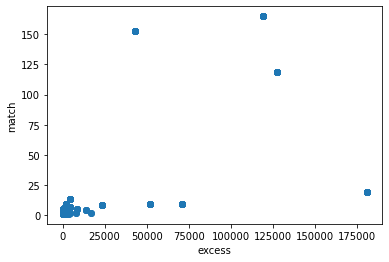

In [9]:
resource = Resource(891931,840)
attribute_analysis(resource,resource_map,company)

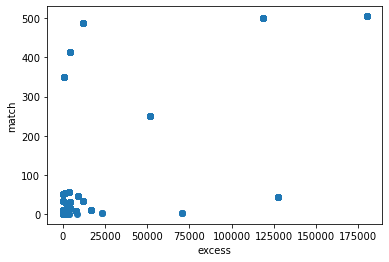

In [10]:
resource = Resource(426577,90)
attribute_analysis(resource,resource_map,company)

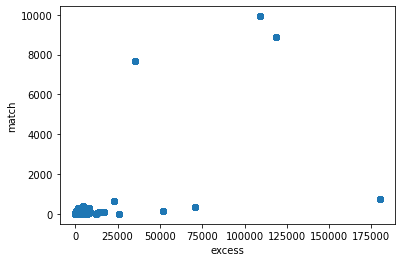

In [11]:
resource = Resource(411231,2072)
attribute_analysis(resource,resource_map,company)